# Face detection with LBPH and openCV

Face recognition using the LBPH (Local Binary Patterns Histograms) classifier with OpenCV is a simple yet effective method that works by analyzing the texture of a face. It divides the face image into smaller regions, computes Local Binary Patterns (LBP) for each, and forms a histogram representing the facial features. These histograms are used to recognize faces by comparing them with stored patterns.

Import necessary libraries

In [1]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir /content/my_new_folder

In [3]:
import zipfile
path='/content/my_new_folder/yalefaces.zip' #which is a dataset from university of yale used for face recognition
zip_object=zipfile.ZipFile(file=path,mode='r') #uncompress the zip file
zip_object.extractall('./')
zip_object.close()

## **Preprocessing the images**

In [4]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject14.wink.gif', 'subject15.leftlight.gif', 'subject15.wink.gif', 'subject04.noglasses.gif', 'subject05.leftlight.gif', 'subject05.normal.gif', 'subject08.sleepy.gif', 'subject05.centerlight.gif', 'subject12.centerlight.gif', 'subject14.rightlight.gif', 'subject07.surprised.gif', 'subject13.centerlight.gif', 'subject12.surprised.gif', 'subject13.wink.gif', 'subject06.surprised.gif', 'subject14.glasses.gif', 'subject10.surprised.gif', 'subject03.noglasses.gif', 'subject02.noglasses.gif', 'subject12.sleepy.gif', 'subject14.happy.gif', 'subject05.happy.gif', 'subject01.rightlight.gif', 'subject08.wink.gif', 'subject09.glasses.gif', 'subject15.noglasses.gif', 'subject01.surprised.gif', 'subject11.normal.gif', 'subject14.surprised.gif', 'subject06.sad.gif', 'subject11.wink.gif', 'subject01.normal.gif', 'subject08.sad.gif', 'subject10.normal.gif', 'subject07.sleepy.gif', 'subject15.centerlight.gif', 'subject05.noglasses.gif', 'subject03.surprised.gif', 'subject10.noglasses.gif', 'subje

Creating a function to go through each images in the train folder

In [7]:
def get_image_data():
  paths=[os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
  #print(paths)
  faces=[] #to store imfo(pixels) about the image
  ids=[] #to store name of classes
  for path in paths:
    image=Image.open(path).convert('L') #inorder to convert a colored image to a grayscale image
    image_np=np.array(image,'uint8') #converting to numpy array
    id=int(os.path.split(path)[1].split('.')[0].replace('subject','')) #to get the class of each image
    ids.append(id)
    faces.append(image_np)
  return np.array(ids),faces

In [8]:
ids,faces=get_image_data()

In [9]:
ids


array([14, 15, 15,  4,  5,  5,  8,  5, 12, 14,  7, 13, 12, 13,  6, 14, 10,
        3,  2, 12, 14,  5,  1,  8,  9, 15,  1, 11, 14,  6, 11,  1,  8, 10,
        7, 15,  5,  3, 10,  8, 15,  9,  9, 10,  4,  3,  4,  3,  9,  3,  7,
       14, 11, 13,  2, 13, 11,  2,  8,  7,  6, 11,  7,  5, 12, 14,  6,  6,
       12, 10, 14,  3,  7, 11,  2,  4,  2, 10,  1,  9,  3, 11, 14, 10,  4,
        1,  6,  1, 10,  4,  1,  3,  6,  9, 13,  3,  2, 13, 12,  2,  1, 15,
        4,  9,  5, 15, 13,  9,  7, 15,  5,  9, 11, 11, 15,  1,  8,  7,  2,
        4,  8,  2,  4,  8,  6, 12,  7, 13,  8, 12, 10,  5,  6, 13, 12])

In [11]:
len(ids) #number of images

135

In [13]:
len(faces)

135

In [14]:
faces[0],faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 241, 241],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

## Training the LBPH classifier

In [43]:
#threshold:1.797
#radius:1
#neighbors:8
#grid_x:8
#grid_y:8
lbph_classifier=cv2.face.LBPHFaceRecognizer_create(radius=4,neighbors=14,grid_x=9,grid_y=9)
lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier.yml')

## Recognizing faces

In [44]:
lbph_face_classifier=cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

Testing an image with the trained file





In [17]:
test_image='/content/yalefaces/test/subject10.sad.gif'

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
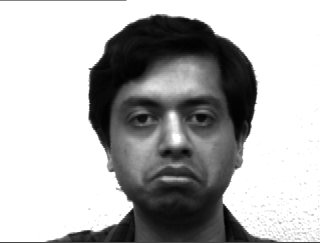

In [18]:
image=Image.open(test_image).convert('L') #inorder to convert to grayscale
image_np=np.array(image,'uint8') #inorder to convert the image type to a numpy array
image_np

In [20]:
image_np.shape

(243, 320)

In [21]:
prediction=lbph_face_classifier.predict(image_np)
prediction

(10, 6.384336446373091)

so the algorithm could correctly classify the image because the number '10' equals the class and the other number is the confidence

In [22]:
expected_output=int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
expected_output

10

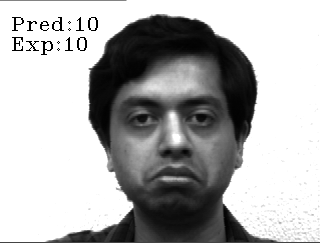

In [23]:
cv2.putText(image_np,'Pred:'+ str(prediction[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2.putText(image_np,'Exp:'+ str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2_imshow(image_np)


## Evaluating the face classifier

In [45]:
paths=[os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
predictions=[]
expected_outputs=[]
for path in paths:
  image=Image.open(path).convert('L')
  image_np=np.array(image,'uint8')
  prediction,_=lbph_face_classifier.predict(image_np)
  expected_output=int(os.path.split(path)[1].split('.')[0].replace('subject',''))
  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [39]:
type(predictions)

list

In [40]:
predictions=np.array(predictions)
expected_outputs=np.array(expected_outputs)

In [41]:
type(predictions)

numpy.ndarray

In [28]:
predictions

array([11,  8, 13,  5, 11, 10,  4,  7, 14,  5,  9,  9, 14, 12,  6,  9, 14,
       13,  4,  7,  4,  4, 12,  5,  1,  3,  1, 15,  9,  7])

In [29]:
expected_outputs

array([11,  8, 13,  5, 11, 10,  8, 15,  6,  5,  3,  9, 14, 12,  6,  4, 14,
       13,  4,  7,  2, 10, 12,  2,  1,  3,  1, 15,  7,  9])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs,predictions)

0.7

There are 15 classes and the algorithm could correctly predict 66% of the classes

In [31]:
len(predictions)

30

Confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(expected_outputs,predictions)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

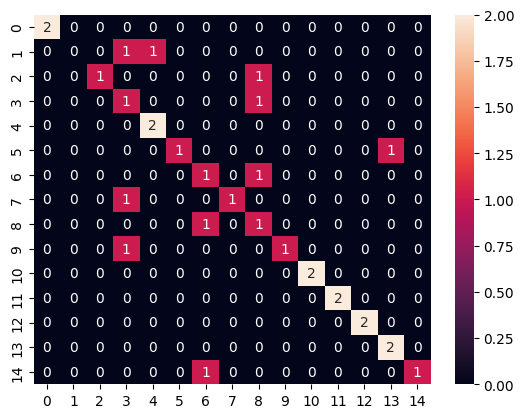

In [34]:
import seaborn
seaborn.heatmap(cm,annot=True);

So we can adjust the values of radius,neighbors, grid_x and grid_y inorder to get better accuracy results